# Introduction to Testing Distributions

### Data Science 410

## Testing distributions

There are many situations in which the probability distribution of a data sample must be determined. Some common testing use cases include:  

- Distributional assumptions before performing hypothesis tests.
- Distribution of features before and after transformations when doing machine learning. 
- Testing residuals arising from regression models.   

These cases raises the question, how can we test a distribution assumption. To answer this question we will now look at both graphical and formal tests in this lesson. 

There are many hypothesis tests for distributions. Here we will only work with the Kolmogorov-Smirnov test. This is a general distributional test which makes few assumptions, but has lower power than more powerful, but restrictive tests. You can, for example, find a specific test for Normal distribution, which makes additional assumptions.   

A word of caution! Real-world data samples are always at least a bit messy. As a result, distributional tests are always a bit approximate. **Do not expect ideal results from graphical or hypothesis test methods**. 

## Graphical Methods and the Q-Q Plot

Given the often approximate nature of distributional testing, graphical methods are often as useful as more formal methods. Simple graphical methods can include histograms and kernel density estimation plots. While these methods can provide some insight, they often lack specificity.         

The quantile-quantile (Q-Q) plot provides a handy visual means to inspect the similarity of distributions of a data set. The general idea is to plot the quantiles of the sample on the vertical axis and the quantiles of the theoretical distribution on the horizontal axis. If the points of the plot fall on an approximately straight line, you can conclude that the sample distribution is close to the theoretical. 

The Normal Q-Q plot, plots the quantiles of a standard Normal distribution on the horizontal axis and the quantiles of the data sample on the vertical axis. If the sample is Normal the data points will fall in a straight line. 

Execute the code in the cells below to import the required packages and compute two samples from a Normal distribution.

In [1]:
import numpy.random as nr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline

In [2]:
nr.seed(1357)
norm1 = nr.normal(size = 100).tolist()
norm2 = nr.normal(size = 100).tolist()

the code in the cell below uses the [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) function to display q-q plots. Run this code to create Q-Q plots of the two samples, and examine the results.

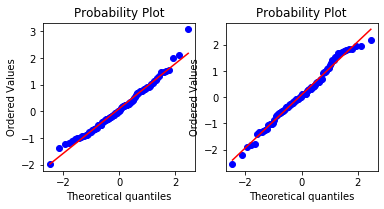

In [3]:
def qq_plot(vec1, vec2):
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2)    

The line of points on both Q-Q plots is close to straight, showing the not surprising result given that both samples are realizations of Normal distributions. Notice however, that in neither case, the lines of dots are not straight, particularly at the ends. This is the case, even where the samples were indeed generated from a Normal distribution.  

As was already stated, results of distribution tests are often imperfect. The imperfection will often be most noticeable with smaller samples.    

You can also test if two samples have similar distributions using the same plot. Run the code in the cell below and examine the result. 

Text(0.5, 1.0, 'Q-Q plot of two distributions')

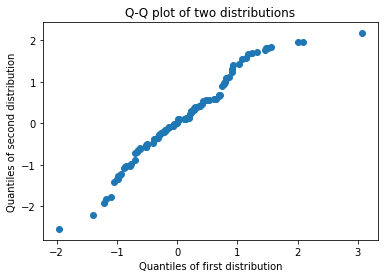

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x = sorted(norm1), y = sorted(norm2))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

Again, not suprisingly, the points line close to a straight line. The noticeable deviations are a result of the small sample size. 

### The Kolmogorov-Smirnov test for distributions

The Kolmogorov-Smirnov test is a general test of the distribution of a sample. The K-S statistic is just the maximum vertical distance between CDF of the sample and the CDF of the theortical distribution. Since it is based on a simple deviatiion the K-S test can test departure from any hypothetical distribution, not just normal. As you should expect, the trade-off for this generality is that the K-S test does not have particularly high power. There are numerious distribution-specific tests with greater power, but will will not discuss those in this lesson. 

<img src="img/Andrey-Nikolayevich-Kolmogorov-1966.jpg" alt="Drawing" style="width:350x; height:350px"/>
<center>Andrey Nikolayevich Kolmogorov, a leading Russian probabilist, in 1966</center>   

As a first step in investigating the Kolmogorov-Smirnov test plot the cumulative distribution functions of the two samples by executing the code in the cell below.

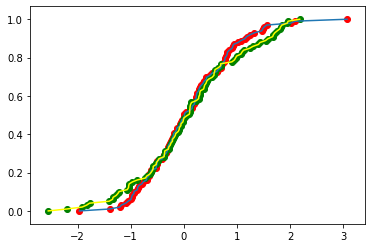

In [5]:
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

plot_cums(norm1, norm2)    

Notice that, as you might expect, the two cumulative density function are quite similar. Even with data sampled from the same theoretical distribution, you can see there is deviation between the cumulative distribution functions. The question is, are these deviations significant? 

The **K-S statistic is the maximum vertical difference** between the two cumulative density functions. Based on this distance and the number of samples, the p-value for the K-S test is computed.  

### Effect of Normalization

Next, let's look at the affect of normalization or standardization of the samples for the K-S test.  It is important that the **samples must be standardized** before applying the Kolmogorov-Smirnov test.  

As an example, the code in the cell below plots the cumulative distribution curves of two Normal distributions. One distribution has significantly greater scale than the other. Execute the code in the cell below to compute and plot the cumulative density functions for both Normal distributions and examine the results.

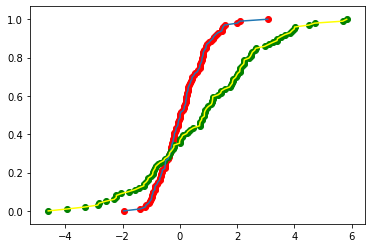

In [6]:
nr.seed(155)
norm3 = nr.normal(loc = 1, scale = 2.0, size = 100).tolist()
plot_cums(norm1, norm3)   

You can see that there are significant deviations between the two cumulative distribution functions. This result indicates that the two samples are drawn from different distributions. 

But, what happens if the distributions are re-scaled to be normalized? The code in the cell below standardizes the two Normal samples and plots the cumulative distributions. Execute this code and examine the results. 

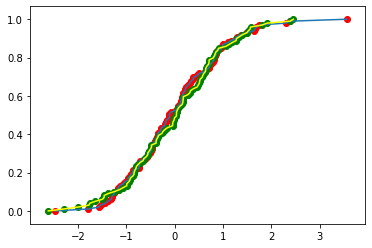

In [7]:
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm3_s = scale(norm3)
plot_cums(norm1_s, norm3_s)  

Notice that the cumulative density plots of the standardized data are quite similar. This indicates the two samples are drawn from the same distribution. This demonstrates that standardization is critical when evaluating distributions.   

### Applying the Kolmogorov-Smirnov test

Now that you have examine cumulative distribution plots you will investigate the formal K-S test. The null hypothesis of the K-S test is that the distributions are the same. **A statistically significant test indicates that the distributions are not the same**.       

You will compute the K-S statistic; the maximum vertical distance between the two cumulative density functions, and the p-value or probability that this difference arises from the null distribution. The code below uses the [scipy.stats.kstest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) function to compute the the K-S test and prints the result. Execute this code. 

In [8]:
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
ks_test(norm1_s)    

KS-statistic = 0.055333681640335475
P-value = 0.9194262643201714


The K-S statistic is quite small and the p-value is large. The chance that we cannot reject the null hypothesis since the probability that the difference arrises by chance alone is high. 

Next, let's see how the KS-test works for two quite different distributions, the Normal and Uniform. The code is the cell below computes the KS-statistics to test the Normality of a Uniform distribution. Execute this code and examine the results. Do these results appear as you expect?

In [9]:
unif = nr.uniform(size = 100).tolist()
ks_test(unif) 

KS-statistic = 0.5017201465353041
P-value = 8.184526019932697e-24


In this case, the K-S statistic is large and the p-value quite small. We can reject the null hypothesis that these distributions are the same, and the chance of this difference of arrising from random variation alone is quite small.

Now, we and test if the samples drawn from the Uniform distribution are consistent with the theoretical Uniform distribution. Execute the code in the cell below and examine the results. 

In [10]:
ks_test(unif, 'uniform') 

KS-statistic = 0.07177397723793816
P-value = 0.681193620963504


In this case, we cannot reject the null hypothesis that these disributions are different. The K-S statistic is small and the p-value is large.  

The K-S test is rather general, as it can be applied to test any distribution. However, this means that the **power** of this test is limited. The power of a test is the probability of rejecting a null hypothesis when the alternative is true. 

As is always the case with clasical statistics, a more powerful test can be created by adopting more restrictive assuptions. For example, the Shapiro-Wilk test has greater power, but is specifically for Normal distributions. 

## Summary

We have covered lot of ground in this lesson. Specifically we have discussed:

- Mean comparison tests in the form of the t-test. In this case, the null hypothesis is that there is no significant difference in means and the samples are from the same popuolation.  
- The $\chi$-squared test for count data. The null hypothesis is that there is no significant differences in the countsand the samples are from the same popuolation. 
- Distribution comparison tests in the form of the K-S test. The null hypothesis is that the two distributions are the same. 
- Variance comparison test for multiple grouped in the form of ANOVA. The null hypothesis is that there are no differences in the variances of the samples and they are all from the same population. 
- The meaning of the p-value or significance level. A p-value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the null hypothesis is true.
- Power of tests. The power of a test is the probability of getting a positive result when the null hypothesis is not true. 
- Multiple compairison issues with applying tests to big data problems. 

#### Copyright 2018, 2019, 2020, Stephen F Elston. All rights reserved.